In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import numpy as np
# 1. Imports
import pandas as pd
from src.modeling.preprocessing import load_and_filter, preprocess, split_data
from src.modeling.models import train_models, evaluate_model
from src.modeling.interpretability import explain_model

In [4]:
# 2. Load & preprocess
# Load dataset and filter to records with TotalClaims > 0
df = pd.read_csv('../data/cleaned_data.txt')
df_claim = load_and_filter('../data/cleaned_data.txt')

# Filter to only rows with positive claim amounts
df_claim = df_claim[df_claim['TotalClaims'] > 0]

# Preprocess features and target
X, y, preprocessor = preprocess(df_claim)

# Split the dataset
X_train, X_test, y_train, y_test = split_data(X, y)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14020\3966870856.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cleaned_data.txt')
C:\Users\Admin\Desktop\KAIM\Week 3\Insurance_risk_analytics_week_03\src\modeling\preprocessing.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_path)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


[[-0.55254893 -0.40717434 -0.25793908 ...  0.          1.
   1.        ]
 [-0.55971313 -0.51841014 -0.96624102 ...  0.          1.
   1.        ]
 [-1.31758936 -1.6301361  -1.07574287 ...  0.          1.
   1.        ]
 ...
 [ 0.66273385  0.80588575  0.56108591 ...  0.          1.
   1.        ]
 [-1.33789089 -1.2239569  -0.66215967 ...  0.          1.
   1.        ]
 [ 1.36653194  1.70988729 -0.32999049 ...  0.          1.
   1.        ]]


In [5]:
# 3. Train models (Linear, RF, XGBoost)
models = train_models(X_train, y_train)

Training LinearRegression...
Training RandomForest...
Training XGBoost...


In [6]:
# 4. Evaluate models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)

# Display evaluation metrics (e.g., RMSE, R²)
results_df = pd.DataFrame(results).T
print(results_df)

                          RMSE        R2
LinearRegression  34553.055692  0.013132
RandomForest      30856.989437  0.212967
XGBoost           32503.070025  0.126758


ValueError: Could not find feature named: UnderwrittenCoverID

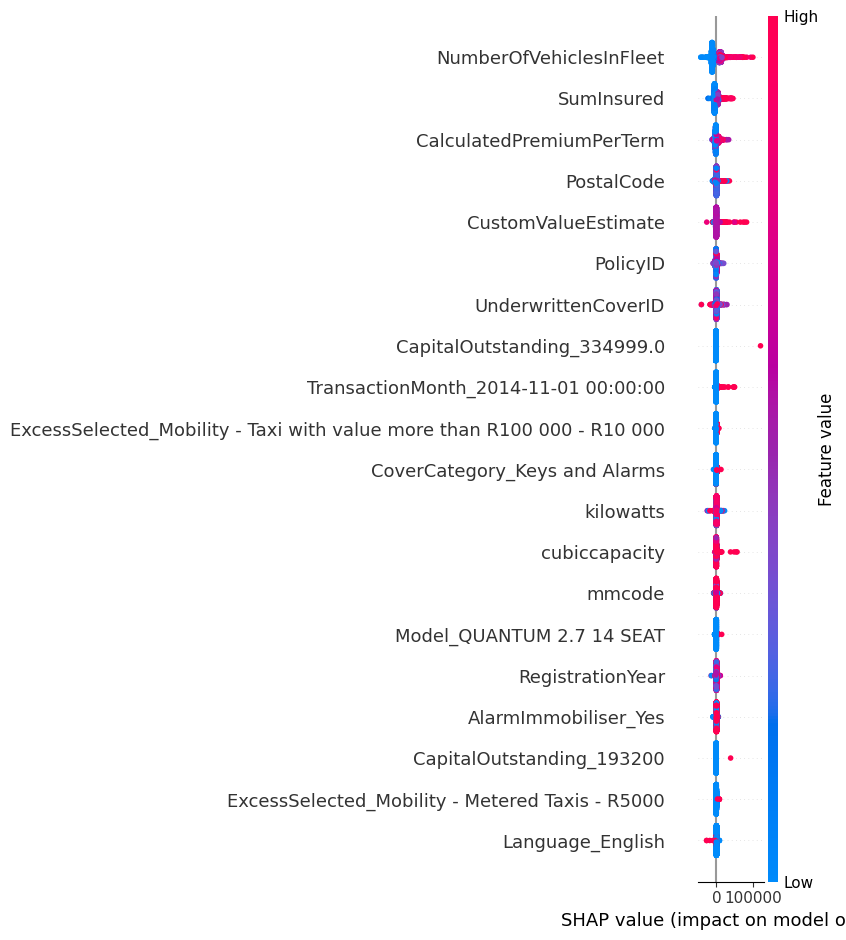

In [8]:
# 5. Interpret best model (e.g., XGBoost)
# Extract feature names after preprocessing
numeric_features = preprocessor.transformers_[0][2]  # List of numeric feature names
cat_transformer = preprocessor.transformers_[1][1]
cat_features = preprocessor.transformers_[1][2]
ohe = cat_transformer.named_steps['ohe']
ohe_feature_names = ohe.get_feature_names_out(cat_features)

feature_names = list(numeric_features) + list(ohe_feature_names)

# Now call explain_model with the correct feature names
explain_model(models['XGBoost'], X_train, preprocessor, feature_names)